In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display
import numpy as np
from matplotlib.ticker import FuncFormatter

In [2]:
#conversion function for turning string numbers (ex: 5K) into actual numbers(ex: 5000)
def convert(value):
    if value:
        multiple = 1
        if value.endswith("K"):
            multiple = 1000
            value = value[0:len(value)-1]
        elif value.endswith("M"):
            multiple = 1000000
            value = value[0:len(value)-1]
        return int(float(value) * multiple)
    else:
        return 0

In [3]:
#read data
instaFile ="Resources/social media influencers - instagram.csv" 
instagram_df1= pd.read_csv(instaFile)
#display(instagram_df1)

instaFile2="Resources/instagram_global_top_1000.csv"
instagram_df2= pd.read_csv(instaFile2)
#display(instagram_df2)

#read in youtube data
youtubeFile ="Resources/social media influencers - youtube.csv" 
youtube_df= pd.read_csv(youtubeFile)
youtube_df

#read youtube data 2
youtubeFile_2 ="Resources/Top YouTube Channels Data.csv"
youtubeFile_2=pd.read_csv(youtubeFile_2)
youtubeFile_2




#data cleaning for Instagram

#display(instagram_df1.isnull().sum())
#drop rows from dataframe where category is missing
#drop rows where country data is missing

instagram_df1 = instagram_df1.dropna(subset=['category_1'])
instagram_df1 = instagram_df1.dropna(subset=['Audience country(mostly)'])
# Check how many having missing are dropped
#display(instagram_df1.isnull().sum())

#drop rows with duplicate instagram instance name
instagram_df1 =instagram_df1.drop_duplicates(subset=["instagram name"],keep='last')

#remove spaces if any from attributes
instagram_df1.columns = instagram_df1.columns.str.replace(' ', '')
# replace messy string column names
instagram_df1.columns=instagram_df1.columns.str.replace('[\t|\n|\r]','',regex=True)


#Convert millions(M) and thousands(K) string data values from 3 columns to numerical form
instagram_df1["Followers"]=instagram_df1["Followers"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
instagram_df1["Authenticengagement"]=instagram_df1["Authenticengagement"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
instagram_df1["Engagementavg"]=instagram_df1["Engagementavg"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)


#link and see the other dataset
#remove spaces if any from attributes
instagram_df2.columns = instagram_df2.columns.str.replace(' ', '')

#data cleaning for youtube
#find duplicate youtubers
yt_unique = len(youtube_df["youtuber name"].unique())
youtube_df.loc[youtube_df.duplicated(keep = False),:]

#data cleaning for youtube data
clean_yt = youtube_df.drop(549)
clean_yt["Subscribers"] = [convert(value) for value in clean_yt["Subscribers"]]
clean_yt["avg views"] = [convert(value) for value in clean_yt["avg views"]]
clean_yt["avg likes"] = clean_yt["avg likes"].fillna(0)
clean_yt["avg likes"] = [convert(value) for value in clean_yt["avg likes"]]
clean_yt["avg comments"] = clean_yt["avg comments"].fillna(0)
clean_yt["avg comments"] = [convert(value) for value in clean_yt["avg comments"]]
clean_yt.sort_values("Subscribers", ascending = False).reset_index()

clean_yt = clean_yt.dropna(subset = ["Category"])
clean_yt.reset_index()

#drop rows from Audience Country that are empty
clean_yt = clean_yt.dropna(subset = ["Audience Country"])
clean_yt.reset_index()

#Sum the column values from avg_views,avg_likes,avg_comments to a new column "Authenticengagement" 
clean_yt['Authenticengagement'] = clean_yt['avg views'] + clean_yt['avg likes'] +clean_yt['avg comments']
display(clean_yt)


,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,Authenticengagement
0,tseries,T-Series,Music & Dance,212100000,India,323700,9800,290,333790
3,PewDiePie,PewDiePie,Animation,111400000,United States,1400000,80800,4600,1485400
4,MrBeast6000,MrBeast,Video games,92500000,United States,30600000,1700000,67700,32367700
7,WWEFanNation,WWE,Video games,86900000,United States,76600,2800,163,79563
8,zeemusiccompany,Zee Music Company,Music & Dance,82700000,India,108700,4200,155,113055
...,...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9200000,Brazil,1400000,110100,2500,1512600
996,EL GATO,EL GATO,Toys,9200000,Brazil,243800,30700,636,275136
997,CinemaSins,CinemaSins,Movies,9200000,United States,296000,10200,874,307074
998,CricketICC,ICC,Sports,9200000,India,15200,854,58,16112


In [4]:
instagram_df1['Audiencecountry(mostly)'].value_counts()
groupby_clean_insta = instagram_df1.groupby(["Audiencecountry(mostly)"])
Clean_insta_followers= groupby_clean_insta.sum().sort_values(by="Followers",ascending=False)
display(Clean_insta_followers)

#display(clean_yt)


clean_yt['Audience Country'].value_counts()
groupby_clean_yt = clean_yt.groupby(["Audience Country"])
Clean_yt_subcribers= groupby_clean_yt.sum().sort_values(by="Subscribers",ascending=False)
display(Clean_yt_subcribers)




,Followers,Authenticengagement,Engagementavg
Audiencecountry(mostly),,,
United States,8.718600e+09,145822999.0,218926699.0
India,5.111000e+09,84746799.0,105764300.0
Brazil,3.593300e+09,57933800.0,87221900.0
Indonesia,1.928200e+09,99419700.0,123395699.0
Spain,7.824000e+08,12246500.0,17820000.0
Mexico,7.347000e+08,23213700.0,29585700.0
Argentina,6.543000e+08,15371400.0,22914300.0
Russia,3.591000e+08,13226300.0,17884300.0
United Kingdom,3.422000e+08,5596200.0,8496700.0


,Subscribers,avg views,avg likes,avg comments,Authenticengagement
Audience Country,,,,,
United States,4180700000,343656799,14719601,701248,359077648
India,2341700000,84332098,5233805,397586,89963489
Brazil,1124600000,37409100,2559880,210296,40179276
Mexico,728099999,45996000,2787210,116199,48899409
Indonesia,508400000,16904873,748441,35545,17688859
Russia,426100000,87154800,5320184,369656,92844640
Philippines,170600000,9373600,455853,21667,9851120
Thailand,153100000,2166200,132570,9446,2308216
Colombia,125299999,4404700,239095,10271,4654066


Text(0.5, 0, 'Countries')

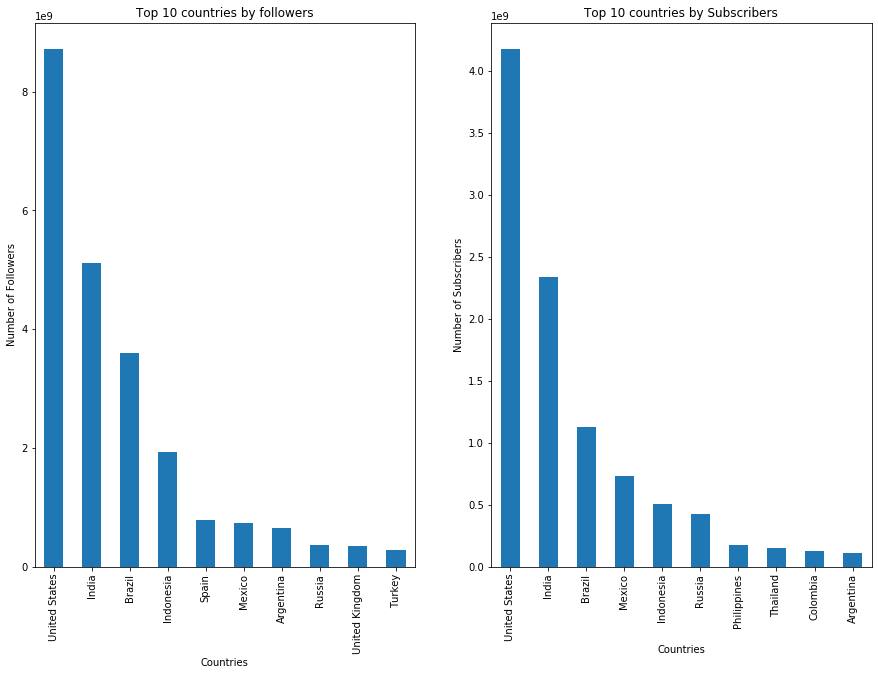

In [5]:
fig, (ax1, ax2)= plt.subplots(1,2)
Clean_insta_followers["Followers"].iloc[0:10].plot(ax=ax1,kind="bar",figsize=(15,10))
ax1.set_title("Top 10 countries by followers")
ax1.set_ylabel("Number of Followers")
ax1.set_xlabel("Countries") 
Clean_yt_subcribers["Subscribers"].iloc[0:10].plot(ax=ax2,kind="bar",figsize=(15,10))
ax2.set_title("Top 10 countries by Subscribers")
ax2.set_ylabel("Number of Subscribers")
ax2.set_xlabel("Countries")

In [6]:
''' 3.Can we predict the relationship between category and engagement level (Instagram, Youtube)?
- Does higher engagement(followers) lead to attract category.
- Do we have max subscriber because the content has been shared/viewed/liked/ maximum times? '''


' 3.Can we predict the relationship between category and engagement level (Instagram, Youtube)?\n- Does higher engagement(followers) lead to attract category.\n- Do we have max subscriber because the content has been shared/viewed/liked/ maximum times? '

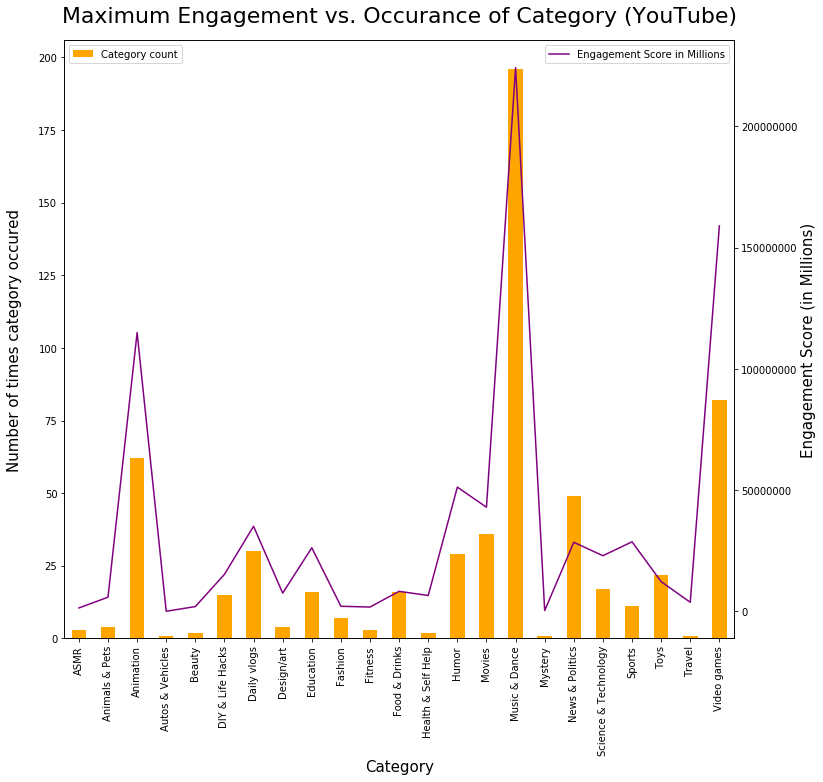

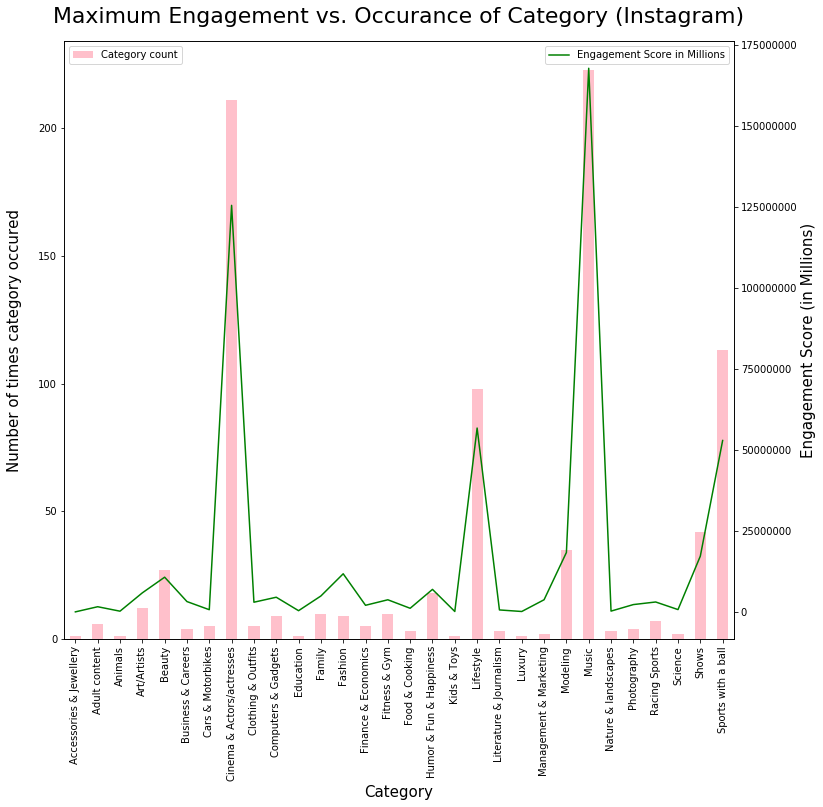

In [7]:
#groupby fnuction on categories from youtube data
groupby_clean_yt = clean_yt.groupby(["Category"])
groupby_clean_yt_bar=pd.DataFrame(groupby_clean_yt["Category"].count())
groupby_clean_yt_line=pd.DataFrame(groupby_clean_yt["Authenticengagement"].sum())

#plot line chart on axis# 1
catEngagementPlot=groupby_clean_yt_bar.plot(kind="bar",figsize=(12,11),rot=90,color="orange")
plt.ylabel("Number of times category occured", labelpad=16,fontsize=15)
plt.xlabel("Category",fontsize=15)
plt.title("Maximum Engagement vs. Occurance of Category (YouTube)", y=1.02, fontsize=22)
text=plt.legend(loc="upper left")
text.get_texts()[0].set_text('Category count')

#set up second axis
ax2 = catEngagementPlot.twinx()
ax2.plot(groupby_clean_yt_line,color="purple")
ax2.set_ylabel("Engagement Score (in Millions)",fontsize=15)
ax2.legend(['Engagement Score in Millions'], loc="upper right")
current_values = plt.gca().get_yticks()
ax2 = plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


#groupby fnuction on categories from Instagram data
groupby_clean_insta = instagram_df1.groupby(["category_1"])
groupby_clean_insta_bar=pd.DataFrame(groupby_clean_insta["category_1"].count())
groupby_clean_insta_line=pd.DataFrame(groupby_clean_insta["Authenticengagement"].sum())

#plot line chart on axis# 1
catEngagementPlot=groupby_clean_insta_bar.plot(kind="bar",figsize=(12,11),rot=90,color="pink")
plt.ylabel("Number of times category occured", labelpad=16,fontsize=15)
plt.xlabel("Category",fontsize=15)
plt.title("Maximum Engagement vs. Occurance of Category (Instagram)", y=1.02, fontsize=22)
text=plt.legend(loc="upper left")
text.get_texts()[0].set_text('Category count')

#set up second axis
ax2 = catEngagementPlot.twinx()
ax2.plot(groupby_clean_insta_line,color="green")
ax2.set_ylabel("Engagement Score (in Millions)",fontsize=15)
ax2.legend(['Engagement Score in Millions'], loc="upper right")
current_values = plt.gca().get_yticks()
ax2 = plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,Authenticengagement,rank,subscribers,video views,video count,category,started
0,CanalKondZilla,Canal KondZilla,Music & Dance,65500000,Brazil,36800,2300,153,39253,20,65600000,"36,145,092,618",2252.0,Music,2012
1,JuegaGerman,JuegaGerman,Animation,45500000,Mexico,1400000,140700,4800,1545500,43,45500000,"13,400,179,485",1918.0,Gaming,2013
2,sonymusicindiaVEVO,SonyMusicIndiaVEVO,Music & Dance,41200000,India,2300,136,19,2455,55,41300000,"22,855,070,416",3228.0,Music,2009
3,A4,A4,Animation,39000000,Russia,12300000,650500,43900,12994400,59,39400000,"14,391,209,548",582.0,Gaming,2014
4,Kimberly Loaiza,Kimberly Loaiza,Daily vlogs,36000000,Mexico,9200000,646500,42300,9888800,75,36200000,"3,997,275,983",197.0,People & Blogs,2016
5,vegetta777,VEGETTA777,Video games,32900000,Mexico,394200,31700,256,426156,93,33000000,"14,724,851,921",7007.0,Gaming,2008


,rank,channelname,subscribers,videoviews,videocount,category,started
0,1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006
1,2,YouTube Movies,150000000,"167,122,746,349",NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,"126,822,520,940",751.0,Education,2006
3,4,SET India,131000000,"101,541,977,714",78334.0,Shows,2006
4,5,Music,116000000,"78,437,871,689",NaN,Music,2013
...,...,...,...,...,...,...,...
95,96,Markiplier,32600000,"18,011,837,263",5129.0,Gaming,2012
96,97,Like Nastya ESP,32600000,"15,144,858,210",584.0,Entertainment,2017
97,98,Ryan's World,32400000,"51,312,603,726",2155.0,Entertainment,2015
98,99,ABP News,32300000,"9,850,740,503",209351.0,People & Blogs,2012


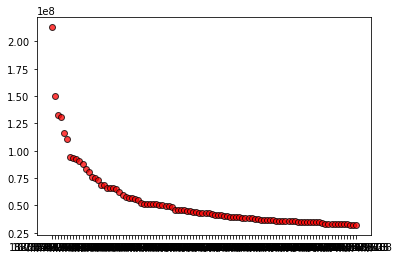

In [8]:
'''6.Is there a relationship between categories per country ?
-Which country to target for getting more content based on category? 
-As video count increases , subscribers increases) Scatter plot
-As video count increases , subscribers increases) Scatter plot'''


#rename youtuber to channel name
youtubeFile_2.rename(columns = {'youtuber':'channel name'}, inplace = True)

#merge two dataframes on common youtuber name
merged_ytdf = pd.merge(clean_yt, youtubeFile_2, on="channel name",how="inner")
display(merged_ytdf)

youtubeFile_2


#remove spaces if any from attributes
youtubeFile_2.columns = youtubeFile_2.columns.str.replace(' ', '')
# replace messy string column names
youtubeFile_2.columns=youtubeFile_2.columns.str.replace('[\t|\n|\r]','',regex=True)
youtubeFile_2


plt.scatter(x=youtubeFile_2['videoviews'],y=youtubeFile_2['subscribers'],marker="o",facecolors="red", edgecolors="black",alpha=0.75,)

#merged_ytdf['videocount']
#merged_ytdf['subscribers']


# #scatter plot

# plt.scatter(x=clean_yt['Authenticengagement'],y=clean_yt['Subscribers'],marker="o",facecolors="red", edgecolors="black",alpha=0.75)

# #merged_ytdf['videocount']
# #merged_ytdf['subscribers']

youtubeFile_2